In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from caps_net import CapsNet
from tqdm import tqdm

C:\Users\16678039\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


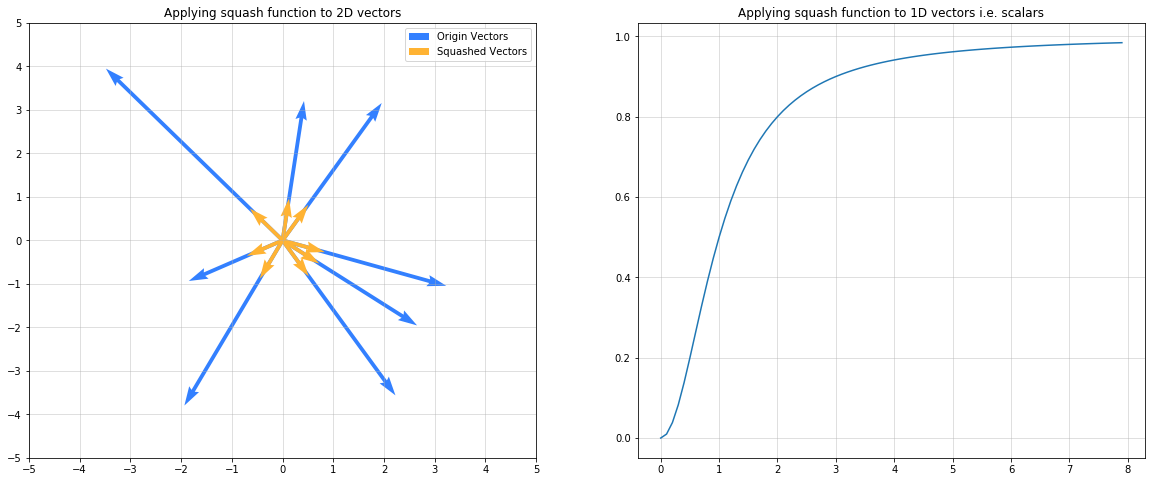

In [4]:
def squash_scalar(x):
    return x**2/(1+x**2)

def squash_vec(x):
    norm = np.linalg.norm(x)
    sq_norm = norm**2
    return sq_norm/(1.0+sq_norm)*x/norm

fig = plt.figure(figsize=(20,8))

x = np.arange(0, 8, 0.1)
y = np.array([squash_scalar(x_i) for x_i in x])

fig.add_subplot(1,2,2)
plt.plot(x, y)
plt.grid(alpha=0.5)
plt.title('Applying squash function to 1D vectors i.e. scalars')

x, y = [0], [0]
u = np.random.rand(8)*10 - 5
v = np.random.rand(8)*10 - 5
sq_vecs = np.array([squash_vec(np.array([x1, x2])) for (x1, x2) in zip(u, v)])
sq_vecs = np.transpose(sq_vecs)

fig.add_subplot(1,2,1)
plt.quiver(x, y, u, v, color =(0.2, 0.5, 1, 1), scale=1, units='xy')
plt.quiver(x, y, sq_vecs[0], sq_vecs[1], color =(1, 0.7, 0.2, 1), scale=1, units='xy')
plt.legend(['Origin Vectors', 'Squashed Vectors'], loc='upper right')
plt.title('Applying squash function to 2D vectors')
ticks = range(-5, 6)
plt.xticks(ticks)
plt.yticks(ticks)
plt.grid(alpha=0.5)

plt.show()

In [2]:
def next_batch(size, x, y):
    idx = np.arange(0 , len(x))
    np.random.shuffle(idx)
    idx = idx[:size]
    data_shuffle = [x[i] for i in idx]
    labels_shuffle = [y[i] for i in idx]
    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

In [4]:
tf.reset_default_graph()
mnist = tf.keras.datasets.mnist
(mnist_x_train, mnist_y_train),(mnist_x_test, mnist_y_test) = mnist.load_data()

INPUT_DIM = (28, 28, 1)
CLASSES = 10
BATCH_SIZE = 10
LEARNING_RATE = 0.01
EPOCHES = 10

caps_net = CapsNet(INPUT_DIM, CLASSES, BATCH_SIZE)

'''
Training on mnist data
'''

optimizer = tf.train.AdamOptimizer(LEARNING_RATE)
training_op = optimizer.minimize(caps_net.loss)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    mnist_num_batches = int(len(mnist_x_train)/BATCH_SIZE)
    init.run()
    for i in range(EPOCHES):
        print('EPOCH: ', i)
        mnist_x_batch, mnist_y_batch = next_batch(BATCH_SIZE, mnist_x_train, mnist_y_train)
        mnist_x_batch = np.reshape(mnist_x_batch, (BATCH_SIZE, 28, 28, 1))
        feed_dict = {
            caps_net.X: mnist_x_batch,
            caps_net.Y: mnist_y_batch
        }
        print(sess.run(caps_net.margin_loss, feed_dict=feed_dict))
        print(sess.run(caps_net.decoder_loss, feed_dict=feed_dict))
        print(sess.run(caps_net.loss, feed_dict=feed_dict))
        for _ in tqdm(range(mnist_num_batches)):
            mnist_x_batch, mnist_y_batch = next_batch(BATCH_SIZE, mnist_x_train, mnist_y_train)
            mnist_x_batch = np.reshape(mnist_x_batch, (BATCH_SIZE, 28, 28, 1))
            feed_dict = {
                caps_net.X: mnist_x_batch,
                caps_net.Y: mnist_y_batch
            }
            sess.run(training_op, feed_dict=feed_dict)

#     x_batch = np.reshape(x_train[0:BATCH_SIZE], (BATCH_SIZE, 28, 28, 1))
#     y_batch = y_train[0:BATCH_SIZE]

    # caps_net.explore_net()
    # caps_net.explore_net(sess=sess, X_batch=x_batch, Y_batch=y_batch)
#     print(sess.run(caps_net.logit, feed_dict={caps_net.X: x_batch, caps_net.Y: y_batch}))
#     print(sess.run(caps_net.margin_loss, feed_dict={caps_net.X: x_batch, caps_net.Y: y_batch}))
#     print(sess.run(caps_net.decoder_loss, feed_dict={caps_net.X: x_batch, caps_net.Y: y_batch}))
#     print(sess.run(caps_net.loss, feed_dict={caps_net.X: x_batch, caps_net.Y: y_batch}))



# print(sess.run(caps_net.T, feed_dict={caps_net.X: x_batch, caps_net.Y: y_batch}))
# print(sess.run(caps_net.out, feed_dict={caps_net.X: x_batch, caps_net.Y: y_batch}))

EPOCH:  0
0.21994638
6738.5938
3.5892434


 27%|██████████▏                           | 1602/6000 [19:32<52:12,  1.40it/s]

KeyboardInterrupt: 